In [1]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

In [2]:
file ="/Users/hillaryram/Downloads/19000-spotify-songs/song_data2.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [5]:
df_copy = df.copy()

In [6]:
df_copy.shape

(18835, 15)

In [7]:
df_copy.shape[0]

18835

In [8]:
df_copy.shape[1]

15

In [9]:
df_copy.columns

Index([u'song_name', u'song_popularity', u'song_duration_ms', u'acousticness',
       u'danceability', u'energy', u'instrumentalness', u'key', u'liveness',
       u'loudness', u'audio_mode', u'speechiness', u'tempo', u'time_signature',
       u'audio_valence'],
      dtype='object')

In [10]:
list(df_copy.columns)

['song_name',
 'song_popularity',
 'song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'audio_mode',
 'speechiness',
 'tempo',
 'time_signature',
 'audio_valence']

In [12]:
df_copy['song_name'].value_counts()

Better                                              21
FEFE (feat. Nicki Minaj & Murda Beatz)              19
MIA (feat. Drake)                                   18
Taki Taki (with Selena Gomez, Ozuna & Cardi B)      18
No Stylist                                          17
Electricity (with Dua Lipa)                         16
I Love It (& Lil Pump)                              16
Promises (with Sam Smith)                           16
Sunflower - Spider-Man: Into the Spider-Verse       16
Mo Bamba                                            16
Lullaby                                             15
Fall                                                14
Happier                                             14
ZEZE (feat. Travis Scott & Offset)                  14
Wake Up in the Sky                                  14
Love Someone                                        14
Be Alright                                          14
This Feeling                                        13
SICKO MODE

In [13]:
df_copy['song_name'].unique()

array(['Boulevard of Broken Dreams', 'In The End', 'Seven Nation Army',
       ..., 'Sudden Love (Acoustic)', 'Gentle on My Mind', 'Up to Me'],
      dtype=object)

In [14]:
l = []
bandera = np.NAN
for column in df_copy.columns:
    if df_copy[column].dtype == np.int64:
        bandera = 'entero'
    elif df_copy[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
        
    try:
        df_copy[column] =df_copy[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df_copy[column].nunique())
    print('UNIQUE: ', df_copy[column].unique())
    print('VALUE COUNTS ', df_copy[column].value_counts())
    print('\n')

('COLUMNA: ', 'song_name')
('TIPO: ', 'otro')
('NUNIQUE: ', 13070)
('UNIQUE: ', array(['Boulevard of Broken Dreams', 'In The End', 'Seven Nation Army',
       ..., 'Sudden Love (Acoustic)', 'Gentle on My Mind', 'Up to Me'],
      dtype=object))
('VALUE COUNTS ', Better                                              21
FEFE (feat. Nicki Minaj & Murda Beatz)              19
MIA (feat. Drake)                                   18
Taki Taki (with Selena Gomez, Ozuna & Cardi B)      18
No Stylist                                          17
Electricity (with Dua Lipa)                         16
I Love It (& Lil Pump)                              16
Promises (with Sam Smith)                           16
Sunflower - Spider-Man: Into the Spider-Verse       16
Mo Bamba                                            16
Lullaby                                             15
Fall                                                14
Happier                                             14
ZEZE (feat. Travis Sco

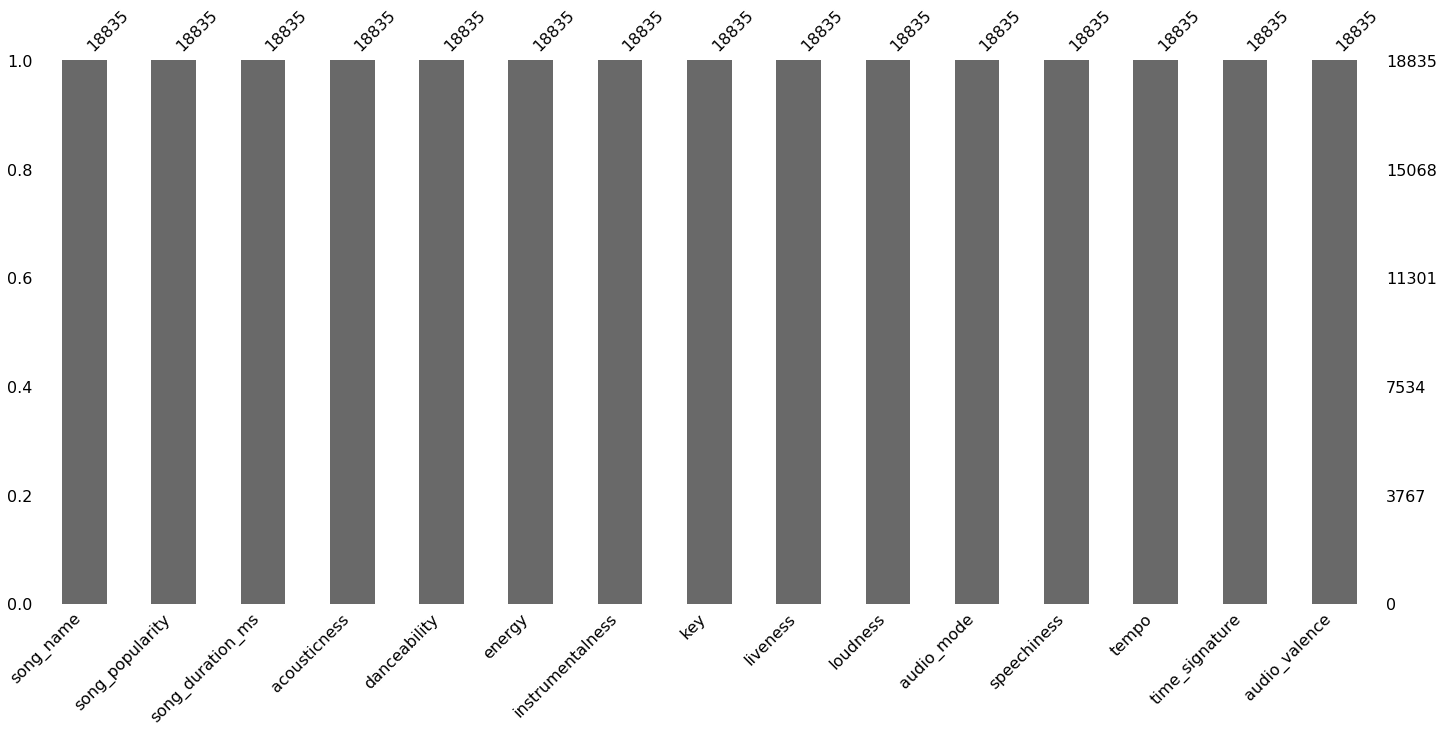

In [15]:
msno.bar(df_copy)

In [ ]:
##Podemos saltarnos de aqui en adelante porque nuestros datos no contienen nuos y demás.

In [ ]:
df_copy.isnull().any().any()

In [ ]:
df_copy.replace(to_replace='&', value=np.nan, inplace=True)

In [ ]:
df_copy.replace(to_replace=' ', value=np.nan, inplace=True)

In [ ]:
df_copy.isnull().any().any()

In [ ]:
msno.bar(df_copy)

In [ ]:
file = 'song_popu.csv'

In [ ]:
df_copy.to_csv(file)

In [ ]:
###limpieza
df_copy.fillna(value=-1, inplace=True)

In [ ]:
threshold = round(df_copy.shape[0]*.75)
threshold

In [ ]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            print(column, ': ', 'd e l e t e d')
            l.append(column)

In [ ]:
l

In [ ]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [ ]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

In [ ]:
msno.bar(df_copy)

In [ ]:
file = 'songpopu_clean.csv'

In [ ]:
df_copy.to_csv(file)